In [1]:
import os
print(os.getcwd())

c:\Users\HOME\Desktop\Azure\model


In [8]:
import pandas as pd
azure_data = pd.read_csv(r"../model/azure_usage.csv")
external_data= pd.read_csv(r"../model/external_factors.csv")

In [9]:
print(azure_data.head())
print(external_data.head())

         date   region resource_type  usage_cpu  usage_storage  users_active
0  2023-01-01  East US            VM         88           1959           470
1  2023-01-01  East US       Storage         92           1595           388
2  2023-01-01  East US     Container         70            621           414
3  2023-01-01  West US            VM         60           1982           287
4  2023-01-01  West US       Storage         85           1371           351
         date  economic_index  cloud_market_demand  holiday
0  2023-01-01          104.97                 0.99        1
1  2023-01-02          106.48                 1.15        0
2  2023-01-03           97.66                 0.98        0
3  2023-01-04          115.79                 1.08        0
4  2023-01-05           95.31                 1.05        0


In [ ]:
#loading the data
df=pd.read_csv("azure_usage.csv")

In [12]:
print(df.columns)

Index(['date', 'region', 'resource_type', 'usage_cpu', 'usage_storage',
       'users_active'],
      dtype='str')


In [13]:
df.rename(columns={'date': 'timestamp'}, inplace=True)


In [ ]:
#convert timestamp to datetime and set as index
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)
df=df.sort_values(by='timestamp')
print(df)

                    region resource_type  usage_cpu  usage_storage  \
timestamp                                                            
2023-01-01         East US            VM         88           1959   
2023-01-01  Southeast Asia     Container         77           1199   
2023-01-01  Southeast Asia       Storage         76           1582   
2023-01-01  Southeast Asia            VM         93           1356   
2023-01-01    North Europe       Storage         51           1715   
...                    ...           ...        ...            ...   
2023-03-31         East US       Storage         51           1789   
2023-03-31         East US            VM         78            604   
2023-03-31  Southeast Asia       Storage         77            776   
2023-03-31         West US       Storage         55           1166   
2023-03-31  Southeast Asia     Container         67            919   

            users_active  
timestamp                 
2023-01-01           470  
2023-01-

In [ ]:
#maps various region names to a standardized format
df['region']=df['region'].str.lower().str.replace("", "_")

In [ ]:
#Maps various region names to a canonical format
df['region']=df['region'].replace({
    'East Us': 'east_us',
    'Southeast Asia': 'southeast_asia',
})
print(df)

                                   region resource_type  usage_cpu  \
timestamp                                                            
2023-01-01                _e_a_s_t_ _u_s_            VM         88   
2023-01-01  _s_o_u_t_h_e_a_s_t_ _a_s_i_a_     Container         77   
2023-01-01  _s_o_u_t_h_e_a_s_t_ _a_s_i_a_       Storage         76   
2023-01-01  _s_o_u_t_h_e_a_s_t_ _a_s_i_a_            VM         93   
2023-01-01      _n_o_r_t_h_ _e_u_r_o_p_e_       Storage         51   
...                                   ...           ...        ...   
2023-03-31                _e_a_s_t_ _u_s_       Storage         51   
2023-03-31                _e_a_s_t_ _u_s_            VM         78   
2023-03-31  _s_o_u_t_h_e_a_s_t_ _a_s_i_a_       Storage         77   
2023-03-31                _w_e_s_t_ _u_s_       Storage         55   
2023-03-31  _s_o_u_t_h_e_a_s_t_ _a_s_i_a_     Container         67   

            usage_storage  users_active  
timestamp                                
2023-

In [ ]:

df=df.drop_duplicates()
print(df)

                                   region resource_type  usage_cpu  \
timestamp                                                            
2023-01-01                _e_a_s_t_ _u_s_            VM         88   
2023-01-01  _s_o_u_t_h_e_a_s_t_ _a_s_i_a_     Container         77   
2023-01-01  _s_o_u_t_h_e_a_s_t_ _a_s_i_a_       Storage         76   
2023-01-01  _s_o_u_t_h_e_a_s_t_ _a_s_i_a_            VM         93   
2023-01-01      _n_o_r_t_h_ _e_u_r_o_p_e_       Storage         51   
...                                   ...           ...        ...   
2023-03-31                _e_a_s_t_ _u_s_       Storage         51   
2023-03-31                _e_a_s_t_ _u_s_            VM         78   
2023-03-31  _s_o_u_t_h_e_a_s_t_ _a_s_i_a_       Storage         77   
2023-03-31                _w_e_s_t_ _u_s_       Storage         55   
2023-03-31  _s_o_u_t_h_e_a_s_t_ _a_s_i_a_     Container         67   

            usage_storage  users_active  
timestamp                                
2023-

In [ ]:
#usage_cpu has some missing values, we will fill them using interpolation
df['usage_cpu']=df['usage_cpu'].interpolate()

In [ ]:
#cost derived from usage metrics
df['cost_usd'] = (df['usage_cpu'] * 0.5) + (df['usage_storage'] * 0.2)


In [22]:
print("Missing values after cleaning:")
print(df.isnull().sum())

Missing values after cleaning:
region           0
resource_type    0
usage_cpu        0
usage_storage    0
users_active     0
cost_usd         0
dtype: int64


In [23]:
print("Duplicates in Azure data:")
print(df.duplicated().sum())        

Duplicates in Azure data:
0


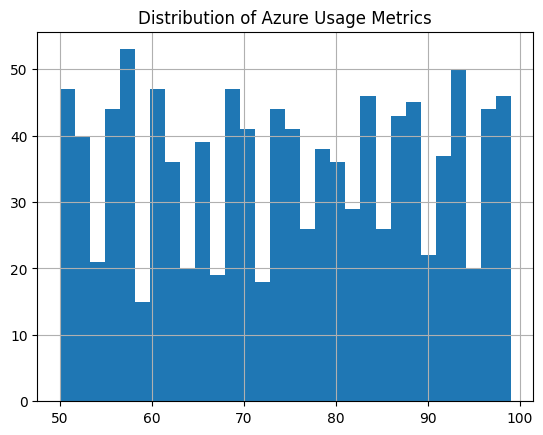

In [29]:
azure_data.hist(column='usage_cpu', bins=30)
plt.title('Distribution of Azure Usage Metrics')
plt.show()

C:\Users\HOME\AppData\Local\Temp\ipykernel_14228\2653263153.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Region')


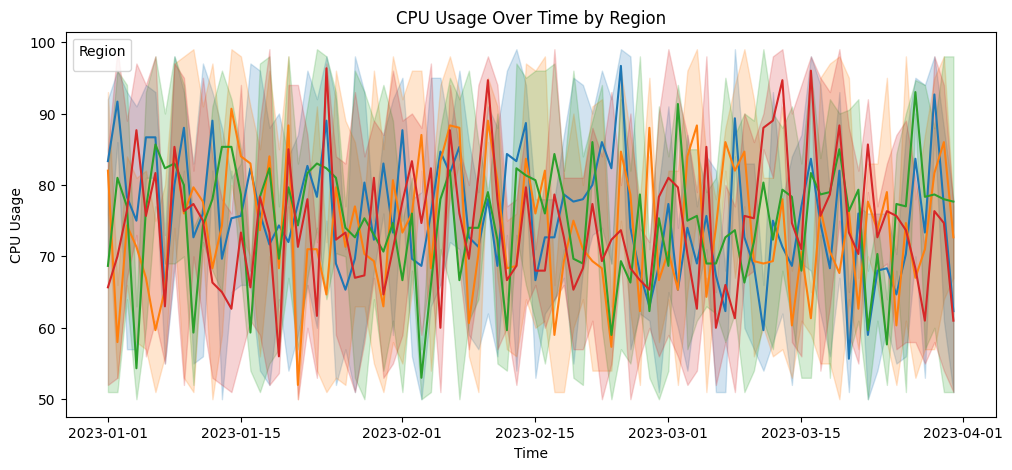

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 5))
sns.lineplot(data=df, x='timestamp', y='usage_cpu', hue='region')
plt.title('CPU Usage Over Time by Region')
plt.xlabel('Time')
plt.ylabel('CPU Usage')
plt.legend(title='Region')
plt.show()